## Script for getting authentication tokens

## Testing script

In [1]:
res = requests.get("https://oauth.reddit.com/r/python/hot",
                   headers=headers)

print(res.json())

NameError: name 'requests' is not defined

## Pakage 

### obtain a reddit instance

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
import praw

reddit = praw.Reddit(
    client_id="P39bEpWzJStkeJRsALO5rQ",
    client_secret="kRm9UlfgJtu3_QULpX-NN3_BzVnCXA",
    password="reTel-65493815",
    user_agent="test1",
    username="Fragrant_Jump7896",
)
print(reddit.read_only)

False


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [67]:
# modules for data cleaning
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag

regexp = RegexpTokenizer('\w+')
stopwords = nltk.corpus.stopwords.words("english")
lemmatizer = WordNetLemmatizer()

# Ragdolls

## Getting Data

In [78]:
# Obatin a subreddit instance
subreddit = reddit.subreddit("ragdolls")

In [79]:
# this is to extract the titles of threads, you can set the limit to whatever number you like
for submission in subreddit.hot(limit=2):
    print(submission.title)
    print(submission.url)
    print(submission.id)
    print(submission.created_utc)

him 🥺
https://i.redd.it/bxdeekqoabg91.jpg
wiio6p
1659886981.0
How could I say no to that face?
https://i.redd.it/f41oz7jyycg91.jpg
wiqg4j
1659907251.0


In [80]:
# use the submission id to create a submission instance, and then extract the comments
submission = reddit.submission("w8rd0z")
print(submission.title)
print(submission.comments)

We are at a new stage of relations, after 4 days of growling and hissing Now my scotish fold Khaji only hisses if the small one rushes right towards him


In [81]:
# how to get the body of a comment
all_comments = submission.comments.list()
print(all_comments[0].body)
print(all_comments[0].created_utc)

The small one reminds me of those cute little Japanese bunny slugs.
1658862175.0


In [82]:
# how to get comment
comment = []
for i in range(len(all_comments)):
    comment.append(all_comments[i].body)

In [152]:
# get title id list
id_list = []
for submission in subreddit.hot(limit=100):
    id_list.append(submission.id)      

In [153]:
# Formalize timestamp
time_stamp = lambda x: datetime.fromtimestamp(x).strftime('%Y/%m/%d %H:%M:%S')

# Create list for comment, title, timestamp and url
comment = []
title_url = []
title = []
title_time = []
comment_time = []
comment_id = []
comment_title_id = []
comment_url = []

for i in id_list:
    submission = reddit.submission(i)
    submission.comments.replace_more(limit=None, threshold=0)
    title.append(submission.title)
    title_url.append(submission.url)
    title_time.append(time_stamp(submission.created_utc))
    all_comments = submission.comments.list()
    for j in range(len(all_comments)):
        comment_title_id.append(i)
        comment_url.append(submission.url)
        comment_id.append(all_comments[j].id)
        comment.append(all_comments[j].body)
        comment_time.append(time_stamp(all_comments[j].created_utc))
        
# Create Dict
id_time_dict = dict(zip(id_list,title_time))
title_id_dict = dict(zip(id_list,title))
id_title_url_dict = dict(zip(id_list,title_url))
comment_time_dict = dict(zip(comment_id,comment_time))
comment_id_dict = dict(zip(comment_id,comment))
comment_title_dict = dict(zip(comment_id,comment_title_id))
comment_id_url = dict(zip(comment_id,comment_url))

# Create title dataframe
df_id_time = pd.DataFrame(list(id_time_dict.items()),columns = ['id','time']) 
df_time_id = pd.DataFrame(list(title_id_dict.items()),columns = ['id','content'])
df_title_url_id = pd.DataFrame(list(id_title_url_dict.items()),columns = ['id','url'])
df1 = pd.merge(df_time_id,df_id_time,how='inner',on='id')
title_data = pd.merge(df1,df_title_url_id,how='inner',on='id')

# Create comment dataframe
df_id_comment_time = pd.DataFrame(list(comment_time_dict.items()),columns = ['id','time']) 
df_id_comment = pd.DataFrame(list(comment_id_dict.items()),columns = ['id','content']) 
df_parent_id = pd.DataFrame(list(comment_id_url.items()),columns = ['id','url'])
df_id_url = pd.DataFrame(list(comment_title_dict.items()),columns = ['id','parent_id_comment'])
df3 = pd.merge(df_id_comment,df_id_comment_time,how='inner',on='id')
df5 = pd.merge(df3,df_id_url,how='inner',on='id')
comment_data = pd.merge(df5,df_parent_id,how='inner',on='id')

# total dataframe
total_data = pd.concat([title_data,comment_data])

total_data.head()

,id,content,time,url,parent_id_comment
0,wk9kle,"every time I'm in my kitchen, I have to step o...",2022/08/09 10:41:19,https://v.redd.it/9zo2in8m5qg91,NaN
1,wk1pd7,The confidence change between Day 1 and Week 2...,2022/08/09 05:11:12,https://www.reddit.com/gallery/wk1pd7,NaN
2,wkb2hh,Human! Is there something for us to eat?,2022/08/09 11:39:38,https://i.redd.it/y0u953j0gqg91.jpg,NaN
3,wkjp9w,She loves playing under the sheets when I make...,2022/08/09 17:48:54,https://www.reddit.com/gallery/wkjp9w,NaN
4,wk7689,Look at this knob,2022/08/09 09:05:56,https://www.reddit.com/gallery/wk7689,NaN


## Data Cleaning

In [155]:
# define content type
def categorise(row):  
    if row['id'] in id_list:
        return 'title'
    else:
        return 'post'
    
# Add type column
total_data['content_type'] = total_data.apply(lambda row: categorise(row), axis=1)
total_data['content_them'] = 'ragdolls'
# Remove emjio and special character in content 
total_data['content'] = total_data['content'].str.replace(r'http\S+', '', regex=True)
total_data['content'] = total_data['content'].str.lower()
# Tokenize content
total_data['content_token'] = total_data['content'].apply(regexp.tokenize)
# Remove stopwords from content
total_data['content_token'] = total_data['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
# Lemmatize words in content
total_data['content_token'] = total_data['content_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
# Remove verb in content
total_data['content_token'] = total_data['content_token'].apply(lambda x: [a for (a,b) in pos_tag(x) if b not in (('VB', 'VBD', 'VBG'))])
# Remove the word that the length of word is shorter than 2
total_data['content_string'] = total_data['content_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

total_data

,id,content,time,url,parent_id_comment,content_type,content_them,content_token,content_string
0,wk9kle,"every time i'm in my kitchen, i have to step o...",2022/08/09 10:41:19,https://v.redd.it/9zo2in8m5qg91,NaN,title,ragdolls,"[every, time, kitchen, upside, cat]",every time kitchen upside cat
1,wk1pd7,the confidence change between day 1 and week 2...,2022/08/09 05:11:12,https://www.reddit.com/gallery/wk1pd7,NaN,title,ragdolls,"[confidence, change, day, 1, week, 2, welcome,...",confidence change day week welcome home leo
2,wkb2hh,human! is there something for us to eat?,2022/08/09 11:39:38,https://i.redd.it/y0u953j0gqg91.jpg,NaN,title,ragdolls,"[human, something, u, eat]",human something eat
3,wkjp9w,she loves playing under the sheets when i make...,2022/08/09 17:48:54,https://www.reddit.com/gallery/wkjp9w,NaN,title,ragdolls,"[sheet, make, bed]",sheet make bed
4,wk7689,look at this knob,2022/08/09 09:05:56,https://www.reddit.com/gallery/wk7689,NaN,title,ragdolls,"[look, knob]",look knob
...,...,...,...,...,...,...,...,...,...
712,iixkzf4,the sweetest and most handsome king of all!,2022/08/04 09:13:53,https://www.reddit.com/gallery/wfo8y5,wfo8y5,post,ragdolls,"[sweetest, handsome, king]",sweetest handsome king
713,iixl4ek,coco is going to be a gorgeous fully grown rag...,2022/08/04 09:14:46,https://i.redd.it/e3tn4avg7nf91.jpg,wfu350,post,ragdolls,"[coco, gorgeous, fully, grown, ragdoll, absolu...",coco gorgeous fully grown ragdoll absolutely b...
714,iizxim5,we just got a little girl who looks identical ...,2022/08/04 18:38:33,https://i.redd.it/e3tn4avg7nf91.jpg,wfu350,post,ragdolls,"[little, girl, identical, named, coco, well]",little girl identical named coco well
715,iivu9hw,little charley is too sweet!,2022/08/03 23:21:12,https://i.redd.it/ph5dbvsaqmf91.jpg,wfsf8w,post,ragdolls,"[little, charley, sweet]",little charley sweet


## Data Analyze

<AxesSubplot:xlabel='time'>

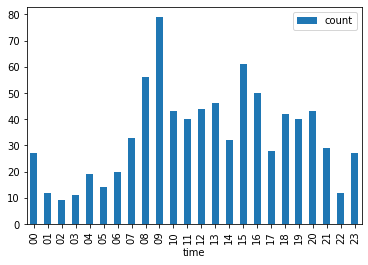

In [156]:
# plot number of content in each time slot
total_data['time'] = pd.to_datetime(total_data['time'])
total_data['time'] = total_data['time'].map(lambda dt: dt.strftime('%H'))
grouped_df = total_data.groupby('time').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='time', y='count')

<AxesSubplot:xlabel='words'>

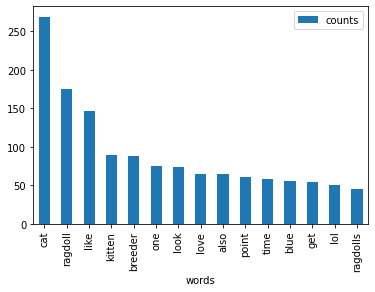

In [157]:
df_word_count = total_data.content_string.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).rename_axis('words').reset_index(name='counts')
df_word_count = df_word_count.sort_values(['counts'], ascending=[False])
df = df_word_count.head(15)
df_word_count.head(15).plot(kind='bar', x ='words', y='counts')

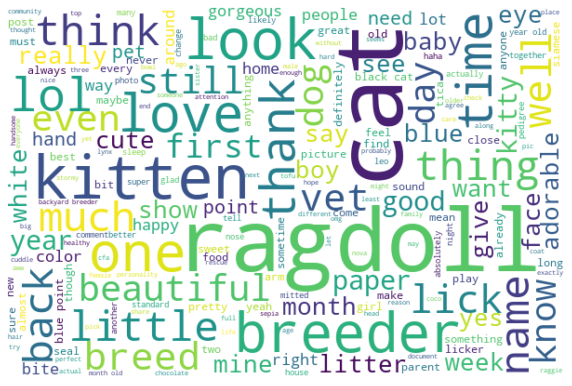

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words_lem = ' '.join([word for word in total_data['content_string']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     background_color="white",
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Disney

## Getting Data

In [159]:
# Define subreddit
subreddit_disney = reddit.subreddit("Disney")

# Create id list 
id_list_disney = []
for submission_disney in subreddit_disney.hot(limit=100):
    id_list_disney.append(submission_disney.id)  

# Create list for comment, title, timestamp and url
comment_disney = []
title_url_disney = []
title_disney = []
title_time_disney = []
comment_time_disney = []
comment_id_disney = []
comment_title_id_disney = []
comment_url_disney = []

for i in id_list_disney:
    submission_disney = reddit.submission(i)
    submission_disney.comments.replace_more(limit=None, threshold=0)
    title_disney.append(submission_disney.title)
    title_url_disney.append(submission_disney.url)
    title_time_disney.append(time_stamp(submission_disney.created_utc))
    all_comments_disney = submission_disney.comments.list()
    for j in range(len(all_comments_disney)):
        comment_title_id_disney.append(i)
        comment_url_disney.append(submission_disney.url)
        comment_id_disney.append(all_comments_disney[j].id)
        comment_disney.append(all_comments_disney[j].body)
        comment_time_disney.append(time_stamp(all_comments_disney[j].created_utc))

# zip list together
id_time_dict_disney = dict(zip(id_list_disney,title_time_disney))
title_id_dict_disney = dict(zip(id_list_disney,title_disney))
id_title_url_dict_disney = dict(zip(id_list_disney,title_url_disney))
comment_time_dict_disney = dict(zip(comment_id_disney,comment_time_disney))
comment_id_dict_disney = dict(zip(comment_id_disney,comment_disney))
comment_title_dict_disney = dict(zip(comment_id_disney,comment_title_id_disney))
comment_id_url_disney = dict(zip(comment_id_disney,comment_url_disney))
        
# Create datafram for title
df_id_time_disney = pd.DataFrame(list(id_time_dict_disney.items()),columns = ['id','time']) 
df_time_id_disney = pd.DataFrame(list(title_id_dict_disney.items()),columns = ['id','content'])
df_title_url_id_disney = pd.DataFrame(list(id_title_url_dict_disney.items()),columns = ['id','url'])
df_disney = pd.merge(df_time_id_disney,df_id_time_disney,how='inner',on='id')
title_data_disney = pd.merge(df_disney,df_title_url_id_disney,how='inner',on='id')

# Create dataframe foe comment 
df_id_comment_time_disney = pd.DataFrame(list(comment_time_dict_disney.items()),columns = ['id','time']) 
df_id_comment_disney = pd.DataFrame(list(comment_id_dict_disney.items()),columns = ['id','content']) 
df_parent_id_disney = pd.DataFrame(list(comment_id_url_disney.items()),columns = ['id','url'])
df_id_url_disney = pd.DataFrame(list(comment_title_dict_disney.items()),columns = ['id','parent_id_comment'])
df3_disney = pd.merge(df_id_comment_disney,df_id_comment_time_disney,how='inner',on='id')
df5_disney = pd.merge(df3_disney,df_id_url_disney,how='inner',on='id')
comment_data_disney = pd.merge(df5_disney,df_parent_id_disney,how='inner',on='id')

# Whole dataframe
total_data_disney = pd.concat([title_data_disney,comment_data_disney])
total_data_disney

,id,content,time,url,parent_id_comment
0,vbu10y,Official r/Disney 'Lightyear' Discussion Threa...,2022/06/13 20:24:30,https://www.reddit.com/r/disney/comments/vbu10...,NaN
1,wkiczl,"Wanted to show a ""relic"" from Disneyland",2022/08/09 16:45:41,https://www.reddit.com/gallery/wkiczl,NaN
2,wk4dqa,"Found this on the attic, what is it?",2022/08/09 07:13:16,https://i.redd.it/kg5rxbuh4pg91.jpg,NaN
3,wjqiei,All these years later and I finally have my ts...,2022/08/08 18:41:23,https://i.redd.it/4dl7lhrcelg91.jpg,NaN
4,wkc7fs,Iv'e finally finished making my Snow White dress,2022/08/09 12:23:47,https://www.reddit.com/gallery/wkc7fs,NaN
...,...,...,...,...,...
428,iiq5ovu,Thank you!,2022/08/02 18:42:48,https://www.reddit.com/gallery/welt5e,welt5e
429,iiyxwo9,This sounds like a vague CEO soundbite. They h...,2022/08/04 14:23:43,https://thatparkplace.com/bob-chapek-announces...,wfpj62
430,iiz2nhp,But Disney has no problem donating to politica...,2022/08/04 14:54:50,https://thatparkplace.com/bob-chapek-announces...,wfpj62
431,iizyoni,Great! Disney shouldn’t be donating to politic...,2022/08/04 18:47:06,https://thatparkplace.com/bob-chapek-announces...,wfpj62


## Data Cleaning

In [160]:
# Create function for defining content type
def categorise_disney(row):  
    if row['id'] in id_list_disney:
        return 'title'
    else:
        return 'post'
    
# Add type column
total_data_disney['content_type'] = total_data_disney.apply(lambda row: categorise_disney(row), axis=1)
total_data_disney['content_them'] = 'disney'
# Remove emjio and special character in content 
total_data_disney['content'] = total_data_disney['content'].str.replace(r'http\S+', '', regex=True)
total_data_disney['content'] = total_data_disney['content'].str.lower()
# Tokenize content
total_data_disney['content_token'] = total_data_disney['content'].apply(regexp.tokenize)
# Remove stopwords from content
total_data_disney['content_token'] = total_data_disney['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
# Lemmatize words in content
total_data_disney['content_token'] = total_data_disney['content_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
# Remove verb in content
total_data_disney['content_token'] = total_data_disney['content_token'].apply(lambda x: [a for (a,b) in pos_tag(x) if b not in (('VB', 'VBD', 'VBG'))])
# Remove the word that the length of word is shorter than 2
total_data_disney['content_string'] = total_data_disney['content_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

total_data_disney

,id,content,time,url,parent_id_comment,content_type,content_them,content_token,content_string
0,vbu10y,official r/disney 'lightyear' discussion threa...,2022/06/13 20:24:30,https://www.reddit.com/r/disney/comments/vbu10...,NaN,title,disney,"[official, r, disney, lightyear, discussion, t...",official disney lightyear discussion thread sp...
1,wkiczl,"wanted to show a ""relic"" from disneyland",2022/08/09 16:45:41,https://www.reddit.com/gallery/wkiczl,NaN,title,disney,"[wanted, show, relic, disneyland]",wanted show relic disneyland
2,wk4dqa,"found this on the attic, what is it?",2022/08/09 07:13:16,https://i.redd.it/kg5rxbuh4pg91.jpg,NaN,title,disney,"[found, attic]",found attic
3,wjqiei,all these years later and i finally have my ts...,2022/08/08 18:41:23,https://i.redd.it/4dl7lhrcelg91.jpg,NaN,title,disney,"[year, later, finally, tsums, displayed, prope...",year later finally tsums displayed properly ev...
4,wkc7fs,iv'e finally finished making my snow white dress,2022/08/09 12:23:47,https://www.reddit.com/gallery/wkc7fs,NaN,title,disney,"[iv, e, finally, snow, white, dress]",finally snow white dress
...,...,...,...,...,...,...,...,...,...
428,iiq5ovu,thank you!,2022/08/02 18:42:48,https://www.reddit.com/gallery/welt5e,welt5e,post,disney,[thank],thank
429,iiyxwo9,this sounds like a vague ceo soundbite. they h...,2022/08/04 14:23:43,https://thatparkplace.com/bob-chapek-announces...,wfpj62,post,disney,"[sound, like, vague, ceo, soundbite, never, po...",sound like vague ceo soundbite never politics ...
430,iiz2nhp,but disney has no problem donating to politica...,2022/08/04 14:54:50,https://thatparkplace.com/bob-chapek-announces...,wfpj62,post,disney,"[disney, problem, political, party, okay, bob]",disney problem political party okay bob
431,iizyoni,great! disney shouldn’t be donating to politic...,2022/08/04 18:47:06,https://thatparkplace.com/bob-chapek-announces...,wfpj62,post,disney,"[great, disney, political, party, topic, thing...",great disney political party topic thing lgbtq...


## Data Analyze

<AxesSubplot:xlabel='time'>

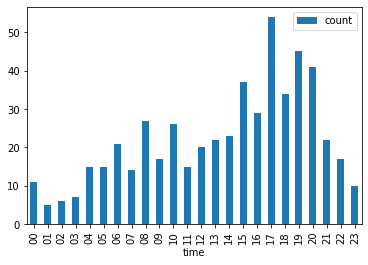

In [161]:
# plot number of content in each time slot
total_data_disney['time'] = pd.to_datetime(total_data_disney['time'])
total_data_disney['time'] = total_data_disney['time'].map(lambda dt: dt.strftime('%H'))
grouped_df_disney = total_data_disney.groupby('time').size().to_frame("count").reset_index()
grouped_df_disney.plot(kind='bar', x='time', y='count')

<AxesSubplot:xlabel='words'>

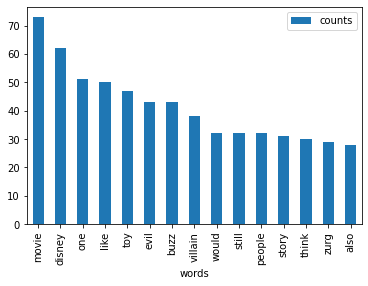

In [162]:
# plot number of times each word showing in the post
df_word_count_disney = total_data_disney.content_string.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).rename_axis('words').reset_index(name='counts')
df_word_count_disney = df_word_count_disney.sort_values(['counts'], ascending=[False])
df_disney = df_word_count_disney.head(15)
df_word_count_disney.head(15).plot(kind='bar', x ='words', y='counts')


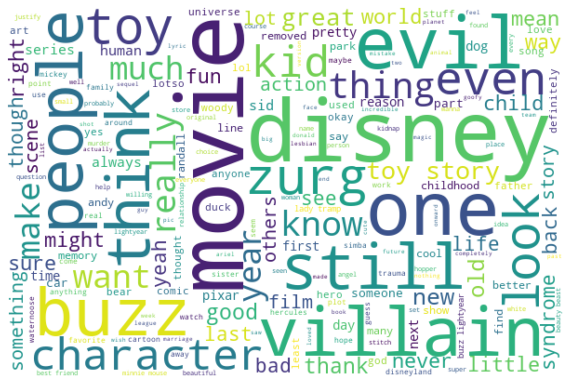

In [163]:
# visualize the key words
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words_lem_disney = ' '.join([word for word in total_data_disney['content_string']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     background_color="white",
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_disney)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Chinese Food

## Getting Data

In [164]:
# Define subreddit
subreddit_food = reddit.subreddit("chinesefood")

# Create id list 
id_list_food = []
for submission_food in subreddit_food.hot(limit=100):
    id_list_food.append(submission_food.id)  

# Create list for comment, title, timestamp and url
comment_food = []
title_url_food = []
title_food = []
title_time_food = []
comment_time_food = []
comment_id_food = []
comment_title_id_food = []
comment_url_food = []

for i in id_list_food:
    submission_food = reddit.submission(i)
    submission_food.comments.replace_more(limit=None, threshold=0)
    title_food.append(submission_food.title)
    title_url_food.append(submission_food.url)
    title_time_food.append(time_stamp(submission_food.created_utc))
    all_comments_food = submission_food.comments.list()
    for j in range(len(all_comments_food)):
        comment_title_id_food.append(i)
        comment_url_food.append(submission_food.url)
        comment_id_food.append(all_comments_food[j].id)
        comment_food.append(all_comments_food[j].body)
        comment_time_food.append(time_stamp(all_comments_food[j].created_utc))

# zip list together
id_time_dict_food = dict(zip(id_list_food,title_time_food))
title_id_dict_food = dict(zip(id_list_food,title_food))
id_title_url_dict_food = dict(zip(id_list_food,title_url_food))
comment_time_dict_food = dict(zip(comment_id_food,comment_time_food))
comment_id_dict_food = dict(zip(comment_id_food,comment_food))
comment_title_dict_food = dict(zip(comment_id_food,comment_title_id_food))
comment_id_url_food = dict(zip(comment_id_food,comment_url_food))
        
# Create datafram for title
df_id_time_food = pd.DataFrame(list(id_time_dict_food.items()),columns = ['id','time']) 
df_time_id_food = pd.DataFrame(list(title_id_dict_food.items()),columns = ['id','content'])
df_title_url_id_food = pd.DataFrame(list(id_title_url_dict_food.items()),columns = ['id','url'])
df_food = pd.merge(df_time_id_food,df_id_time_food,how='inner',on='id')
title_data_food = pd.merge(df_food,df_title_url_id_food,how='inner',on='id')

# Create dataframe foe comment 
df_id_comment_time_food = pd.DataFrame(list(comment_time_dict_food.items()),columns = ['id','time']) 
df_id_comment_food = pd.DataFrame(list(comment_id_dict_food.items()),columns = ['id','content']) 
df_parent_id_food = pd.DataFrame(list(comment_id_url_food.items()),columns = ['id','url'])
df_id_url_food = pd.DataFrame(list(comment_title_dict_food.items()),columns = ['id','parent_id_comment'])
df3_food = pd.merge(df_id_comment_food,df_id_comment_time_food,how='inner',on='id')
df5_food = pd.merge(df3_food,df_id_url_food,how='inner',on='id')
comment_data_food = pd.merge(df5_food,df_parent_id_food,how='inner',on='id')

# Whole dataframe
total_data_food = pd.concat([title_data_food,comment_data_food])
total_data_food.head()


,id,content,time,url,parent_id_comment
0,wkj5xi,What is the secret to Chinese restaurant fried...,2022/08/09 17:23:06,https://www.reddit.com/r/chinesefood/comments/...,NaN
1,wk0zd0,Is the origin of this Chinese? Durian (any fru...,2022/08/09 04:33:48,https://i.redd.it/8u8qqfk1cog91.jpg,NaN
2,wk9mjz,"Hey everyone. As a student of food, and lover ...",2022/08/09 10:43:31,https://www.reddit.com/r/chinesefood/comments/...,NaN
3,wj8gmo,Peking Duck Crepe Jianbing(煎饼) - Chinese Stree...,2022/08/08 06:08:35,https://www.youtube.com/watch?v=bjUohRG-_9I,NaN
4,wiona1,Mung Bean Cake (绿豆糕)-The desert that cools you...,2022/08/07 13:02:51,https://i.redd.it/5zk62bdrkcg91.png,NaN


## Data Cleaning

In [165]:
# Create function for defining content type
def categorise_food(row):  
    if row['id'] in id_list_food:
        return 'title'
    else:
        return 'post'
    
# Add type column
total_data_food['content_type'] = total_data_food.apply(lambda row: categorise_food(row), axis=1)
total_data_food['content_them'] = 'food'
# Remove emjio and special character in content 
total_data_food['content'] = total_data_food['content'].str.replace(r'http\S+', '', regex=True)
total_data_food['content'] = total_data_food['content'].str.lower()
# Tokenize content
total_data_food['content_token'] = total_data_food['content'].apply(regexp.tokenize)
# Remove stopwords from content
total_data_food['content_token'] = total_data_food['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
# Lemmatize words in content
total_data_food['content_token'] = total_data_food['content_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
# Remove verb in content
total_data_food['content_token'] = total_data_food['content_token'].apply(lambda x: [a for (a,b) in pos_tag(x) if b not in (('VB', 'VBD', 'VBG'))])
# Remove the word that the length of word is shorter than 2
total_data_food['content_string'] = total_data_food['content_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

total_data_food.head()

,id,content,time,url,parent_id_comment,content_type,content_them,content_token,content_string
0,wkj5xi,what is the secret to chinese restaurant fried...,2022/08/09 17:23:06,https://www.reddit.com/r/chinesefood/comments/...,NaN,title,food,"[secret, chinese, restaurant, rice, besides, d...",secret chinese restaurant rice besides day old...
1,wk0zd0,is the origin of this chinese? durian (any fru...,2022/08/09 04:33:48,https://i.redd.it/8u8qqfk1cog91.jpg,NaN,title,food,"[origin, chinese, durian, fruit, cream, thin, ...",origin chinese durian fruit cream thin crepe s...
2,wk9mjz,"hey everyone. as a student of food, and lover ...",2022/08/09 10:43:31,https://www.reddit.com/r/chinesefood/comments/...,NaN,title,food,"[hey, everyone, student, food, lover, regional...",hey everyone student food lover regionalities ...
3,wj8gmo,peking duck crepe jianbing(煎饼) - chinese stree...,2022/08/08 06:08:35,https://www.youtube.com/watch?v=bjUohRG-_9I,NaN,title,food,"[duck, crepe, 煎饼, chinese, street, food, stree...",duck crepe chinese street food street food str...
4,wiona1,mung bean cake (绿豆糕)-the desert that cools you...,2022/08/07 13:02:51,https://i.redd.it/5zk62bdrkcg91.png,NaN,title,food,"[mung, bean, cake, 绿豆糕, desert, cool, hot, sum...",mung bean cake 绿豆糕 desert cool hot summer pict...


## Data Analyze

<AxesSubplot:xlabel='time'>

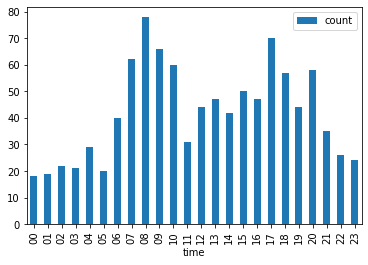

In [166]:
# plot number of content in each time slot
total_data_food['time'] = pd.to_datetime(total_data_food['time'])
total_data_food['time'] = total_data_food['time'].map(lambda dt: dt.strftime('%H'))
grouped_df_food = total_data_food.groupby('time').size().to_frame("count").reset_index()
grouped_df_food.plot(kind='bar', x='time', y='count')

<AxesSubplot:xlabel='words'>

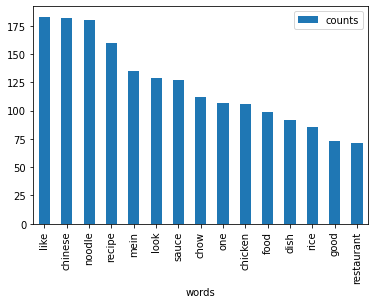

In [167]:
# plot number of times each word showing in the post
df_word_count_food = total_data_food.content_string.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).rename_axis('words').reset_index(name='counts')
df_word_count_food = df_word_count_food.sort_values(['counts'], ascending=[False])
df_food = df_word_count_food.head(15)
df_word_count_food.head(15).plot(kind='bar', x ='words', y='counts')

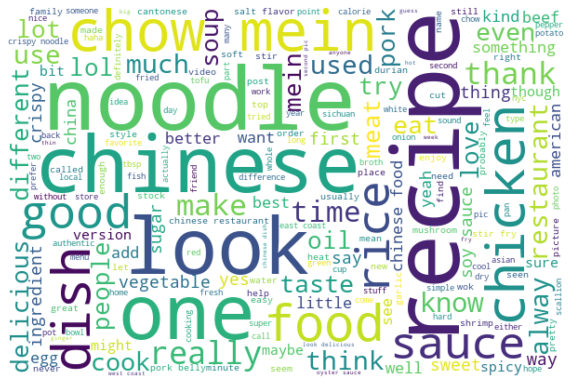

In [168]:
# visualize the key words
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words_lem_food = ' '.join([word for word in total_data_food['content_string']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     background_color="white",
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_food)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Black Friday

## Getting Data

In [169]:
# Define subreddit
subreddit_black = reddit.subreddit("blackfriday")

# Create id list 
id_list_black = []
for submission_black in subreddit_black.hot(limit=100):
    id_list_black.append(submission_black.id)  

# Create list for comment, title, timestamp and url
comment_black = []
title_url_black = []
title_black = []
title_time_black = []
comment_time_black = []
comment_id_black = []
comment_title_id_black = []
comment_url_black = []

for i in id_list_black:
    submission_black = reddit.submission(i)
    submission_black.comments.replace_more(limit=None, threshold=0)
    title_black.append(submission_black.title)
    title_url_black.append(submission_black.url)
    title_time_black.append(time_stamp(submission_black.created_utc))
    all_comments_black = submission_black.comments.list()
    for j in range(len(all_comments_black)):
        comment_title_id_black.append(i)
        comment_url_black.append(submission_black.url)
        comment_id_black.append(all_comments_black[j].id)
        comment_black.append(all_comments_black[j].body)
        comment_time_black.append(time_stamp(all_comments_black[j].created_utc))

# zip list together
id_time_dict_black = dict(zip(id_list_black,title_time_black))
title_id_dict_black = dict(zip(id_list_black,title_black))
id_title_url_dict_black = dict(zip(id_list_black,title_url_black))
comment_time_dict_black = dict(zip(comment_id_black,comment_time_black))
comment_id_dict_black = dict(zip(comment_id_black,comment_black))
comment_title_dict_black = dict(zip(comment_id_black,comment_title_id_black))
comment_id_url_black = dict(zip(comment_id_black,comment_url_black))
        
# Create datafram for title
df_id_time_black = pd.DataFrame(list(id_time_dict_black.items()),columns = ['id','time']) 
df_time_id_black = pd.DataFrame(list(title_id_dict_black.items()),columns = ['id','content'])
df_title_url_id_black = pd.DataFrame(list(id_title_url_dict_black.items()),columns = ['id','url'])
df_black = pd.merge(df_time_id_black,df_id_time_black,how='inner',on='id')
title_data_black = pd.merge(df_black,df_title_url_id_black,how='inner',on='id')

# Create dataframe foe comment 
df_id_comment_time_black = pd.DataFrame(list(comment_time_dict_black.items()),columns = ['id','time']) 
df_id_comment_black = pd.DataFrame(list(comment_id_dict_black.items()),columns = ['id','content']) 
df_parent_id_black = pd.DataFrame(list(comment_id_url_black.items()),columns = ['id','url'])
df_id_url_black = pd.DataFrame(list(comment_title_dict_black.items()),columns = ['id','parent_id_comment'])
df3_black = pd.merge(df_id_comment_black,df_id_comment_time_black,how='inner',on='id')
df5_black = pd.merge(df3_black,df_id_url_black,how='inner',on='id')
comment_data_black = pd.merge(df5_black,df_parent_id_black,how='inner',on='id')

# Whole dataframe
total_data_black = pd.concat([title_data_black,comment_data_black])
total_data_black.head()


,id,content,time,url,parent_id_comment
0,rbj029,Is your post not showing up? Read this first.,2021/12/07 20:47:33,https://www.reddit.com/r/blackfriday/comments/...,NaN
1,r5pal4,[Amazon / US] 2-Count 6' Anker 60W USB-C to US...,2021/11/30 07:09:27,https://www.amazon.com/Anker-Charging-MacBook-...,NaN
2,r5cfan,[Nike / US] Apple Watch Nike SE & Apple Watch ...,2021/11/29 18:31:30,https://www.reddit.com/r/blackfriday/comments/...,NaN
3,r5eh8z,Philips Norelco Bodygroom 7000 $42.46 after ra...,2021/11/29 20:15:14,https://www.usa.philips.com/c-p/BG7030_49/nore...,NaN
4,r50egx,[Poppysocks] Huge thanks to Reddit. 15% off ev...,2021/11/29 09:08:03,https://www.reddit.com/r/blackfriday/comments/...,NaN


## Data Cleaning

In [170]:
# Create function for defining content type
def categorise_black(row):  
    if row['id'] in id_list_black:
        return 'title'
    else:
        return 'post'
    
# Add type column
total_data_black['content_type'] = total_data_black.apply(lambda row: categorise_black(row), axis=1)
total_data_black['content_them'] = 'black friday'
# Remove emjio and special character in content 
total_data_black['content'] = total_data_black['content'].str.replace(r'http\S+', '', regex=True)
total_data_black['content'] = total_data_black['content'].str.lower()
# Tokenize content
total_data_black['content_token'] = total_data_black['content'].apply(regexp.tokenize)
# Remove stopwords from content
total_data_black['content_token'] = total_data_black['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
# Lemmatize words in content
total_data_black['content_token'] = total_data_black['content_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
# Remove verb in content
total_data_black['content_token'] = total_data_black['content_token'].apply(lambda x: [a for (a,b) in pos_tag(x) if b not in (('VB', 'VBD', 'VBG'))])
# Remove the word that the length of word is shorter than 2
total_data_black['content_string'] = total_data_black['content_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

total_data_black.head()

,id,content,time,url,parent_id_comment,content_type,content_them,content_token,content_string
0,rbj029,is your post not showing up? read this first.,2021/12/07 20:47:33,https://www.reddit.com/r/blackfriday/comments/...,NaN,title,black friday,"[post, read, first]",post read first
1,r5pal4,[amazon / us] 2-count 6' anker 60w usb-c to us...,2021/11/30 07:09:27,https://www.amazon.com/Anker-Charging-MacBook-...,NaN,title,black friday,"[amazon, u, 2, count, 6, anker, 60w, usb, c, u...",amazon count anker 60w usb usb cable black
2,r5cfan,[nike / us] apple watch nike se & apple watch ...,2021/11/29 18:31:30,https://www.reddit.com/r/blackfriday/comments/...,NaN,title,black friday,"[nike, u, apple, watch, nike, se, apple, watch...",nike apple watch nike apple watch nike series ...
3,r5eh8z,philips norelco bodygroom 7000 $42.46 after ra...,2021/11/29 20:15:14,https://www.usa.philips.com/c-p/BG7030_49/nore...,NaN,title,black friday,"[philip, norelco, bodygroom, 7000, 42, 46, rak...",philip norelco bodygroom 7000 rakuten back tod...
4,r50egx,[poppysocks] huge thanks to reddit. 15% off ev...,2021/11/29 09:08:03,https://www.reddit.com/r/blackfriday/comments/...,NaN,title,black friday,"[poppysocks, huge, thanks, reddit, 15, everyth...",poppysocks huge thanks reddit everything littl...


## Data Analyze

<AxesSubplot:xlabel='time'>

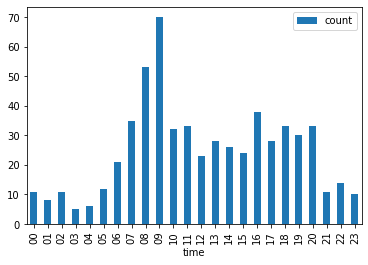

In [171]:
# plot number of content in each time slot
total_data_black['time'] = pd.to_datetime(total_data_black['time'])
total_data_black['time'] = total_data_black['time'].map(lambda dt: dt.strftime('%H'))
grouped_df_black = total_data_black.groupby('time').size().to_frame("count").reset_index()
grouped_df_black.plot(kind='bar', x='time', y='count')

<AxesSubplot:xlabel='words'>

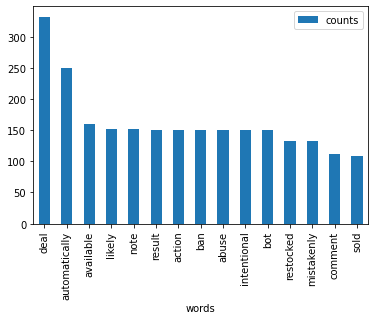

In [172]:
# plot number of times each word showing in the post
df_word_count_black = total_data_black.content_string.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).rename_axis('words').reset_index(name='counts')
df_word_count_black = df_word_count_black.sort_values(['counts'], ascending=[False])
df_black = df_word_count_black.head(15)
df_word_count_black.head(15).plot(kind='bar', x ='words', y='counts')

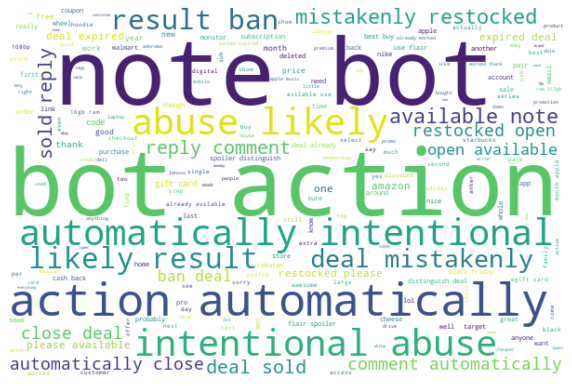

In [173]:
# visualize the key words
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words_lem_black = ' '.join([word for word in total_data_black['content_string']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     background_color="white",
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_black)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Genshin Impact

In [174]:
# Define subreddit
subreddit_game = reddit.subreddit("GenshinImpact")

# Create id list 
id_list_game = []
for submission_game in subreddit_game.hot(limit=100):
    id_list_game.append(submission_game.id) 

# Create list for comment, title, timestamp and url
comment_game = []
title_url_game = []
title_game = []
title_time_game = []
comment_time_game = []
comment_id_game = []
comment_title_id_game = []
comment_url_game = []

for i in id_list_game:
    submission_game = reddit.submission(i)
    submission_game.comments.replace_more(limit=None, threshold=0)
    title_game.append(submission_game.title)
    title_url_game.append(submission_game.url)
    title_time_game.append(time_stamp(submission_game.created_utc))
    all_comments_game = submission_game.comments.list()
    for j in range(len(all_comments_game)):
        comment_title_id_game.append(i)
        comment_url_game.append(submission_game.url)
        comment_id_game.append(all_comments_game[j].id)
        comment_game.append(all_comments_game[j].body)
        comment_time_game.append(time_stamp(all_comments_game[j].created_utc))

# zip list together
id_time_dict_game = dict(zip(id_list_game,title_time_game))
title_id_dict_game = dict(zip(id_list_game,title_game))
id_title_url_dict_game = dict(zip(id_list_game,title_url_game))
comment_time_dict_game = dict(zip(comment_id_game,comment_time_game))
comment_id_dict_game = dict(zip(comment_id_game,comment_game))
comment_title_dict_game = dict(zip(comment_id_game,comment_title_id_game))
comment_id_url_game = dict(zip(comment_id_game,comment_url_game))

# Create datafram for title
df_id_time_game = pd.DataFrame(list(id_time_dict_game.items()),columns = ['id','time']) 
df_time_id_game = pd.DataFrame(list(title_id_dict_game.items()),columns = ['id','content'])
df_title_url_id_game = pd.DataFrame(list(id_title_url_dict_game.items()),columns = ['id','url'])
df_game = pd.merge(df_time_id_game,df_id_time_game,how='inner',on='id')
title_data_game = pd.merge(df_game,df_title_url_id_game,how='inner',on='id')

# Create dataframe foe comment 
df_id_comment_time_game = pd.DataFrame(list(comment_time_dict_game.items()),columns = ['id','time']) 
df_id_comment_game = pd.DataFrame(list(comment_id_dict_game.items()),columns = ['id','content']) 
df_parent_id_game = pd.DataFrame(list(comment_id_url_game.items()),columns = ['id','url'])
df_id_url_game = pd.DataFrame(list(comment_title_dict_game.items()),columns = ['id','parent_id_comment'])
df3_game = pd.merge(df_id_comment_game,df_id_comment_time_game,how='inner',on='id')
df5_game = pd.merge(df3_game,df_id_url_game,how='inner',on='id')
comment_data_game = pd.merge(df5_game,df_parent_id_game,how='inner',on='id')

# Whole dataframe
total_data_game = pd.concat([title_data_game,comment_data_game])
total_data_game.head()


,id,content,time,url,parent_id_comment
0,wkbku4,It's a shame that's not 5stars.,2022/08/09 11:59:52,https://i.redd.it/y4xjr51mjqg91.jpg,NaN
1,wkc4xp,"Just wanted Bennet, but instead got Yoimiya + ...",2022/08/09 12:21:04,https://i.redd.it/c0cw6ursmqg91.png,NaN
2,wki7rx,Carassius Auratus,2022/08/09 16:39:05,https://i.redd.it/viw0k99cxrg91.png,NaN
3,wkfkck,"Fine, I'll do it myself then",2022/08/09 14:43:07,https://www.reddit.com/gallery/wkfkck,NaN
4,wk01cm,My Almost 1k EM Kazuha Build,2022/08/09 03:41:45,https://www.reddit.com/gallery/wk01cm,NaN


## Data Cleaning

In [175]:
# Create function for defining content type
def categorise_game(row):  
    if row['id'] in id_list_game:
        return 'title'
    else:
        return 'post'
    
# Add type column
total_data_game['content_type'] = total_data_game.apply(lambda row: categorise_game(row), axis=1)
total_data_game['content_them'] = 'game'
# Remove emjio and special character in content 
total_data_game['content'] = total_data_game['content'].str.replace(r'http\S+', '', regex=True)
total_data_game['content'] = total_data_game['content'].str.lower()
# Tokenize content
total_data_game['content_token'] = total_data_game['content'].apply(regexp.tokenize)
# Remove stopwords from content
total_data_game['content_token'] = total_data_game['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
# Lemmatize words in content
total_data_game['content_token'] = total_data_game['content_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
# Remove verb in content
total_data_game['content_token'] = total_data_game['content_token'].apply(lambda x: [a for (a,b) in pos_tag(x) if b not in (('VB', 'VBD', 'VBG'))])
# Remove the word that the length of word is shorter than 2
total_data_game['content_string'] = total_data_game['content_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

total_data_game.head()

,id,content,time,url,parent_id_comment,content_type,content_them,content_token,content_string
0,wkbku4,it's a shame that's not 5stars.,2022/08/09 11:59:52,https://i.redd.it/y4xjr51mjqg91.jpg,NaN,title,game,"[shame, 5stars]",shame 5stars
1,wkc4xp,"just wanted bennet, but instead got yoimiya + ...",2022/08/09 12:21:04,https://i.redd.it/c0cw6ursmqg91.png,NaN,title,game,"[wanted, bennet, instead, yoimiya, yun, jin, c...",wanted bennet instead yoimiya yun jin combo curse
2,wki7rx,carassius auratus,2022/08/09 16:39:05,https://i.redd.it/viw0k99cxrg91.png,NaN,title,game,"[carassius, auratus]",carassius auratus
3,wkfkck,"fine, i'll do it myself then",2022/08/09 14:43:07,https://www.reddit.com/gallery/wkfkck,NaN,title,game,[fine],fine
4,wk01cm,my almost 1k em kazuha build,2022/08/09 03:41:45,https://www.reddit.com/gallery/wk01cm,NaN,title,game,"[almost, 1k, em, kazuha, build]",almost kazuha build


## Data Analyze

<AxesSubplot:xlabel='time'>

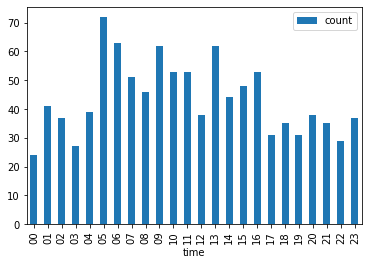

In [176]:
# plot number of content in each time slot
total_data_game['time'] = pd.to_datetime(total_data_game['time'])
total_data_game['time'] = total_data_game['time'].map(lambda dt: dt.strftime('%H'))
grouped_df_game = total_data_game.groupby('time').size().to_frame("count").reset_index()
grouped_df_game.plot(kind='bar', x='time', y='count')

<AxesSubplot:xlabel='words'>

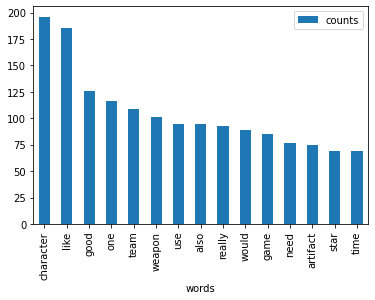

In [177]:
# plot number of times each word showing in the post
df_word_count_game = total_data_game.content_string.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).rename_axis('words').reset_index(name='counts')
df_word_count_game = df_word_count_game.sort_values(['counts'], ascending=[False])
df_game = df_word_count_game.head(15)
df_word_count_game.head(15).plot(kind='bar', x ='words', y='counts')

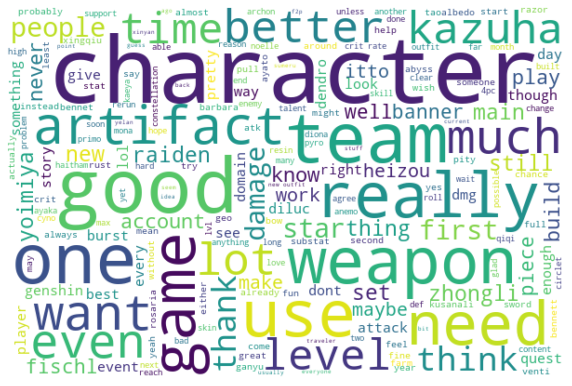

In [178]:
# visualize the key words
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words_lem_game = ' '.join([word for word in total_data_game['content_string']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     background_color="white",
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_game)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Classification 

In [186]:
# Convert panda dataframe to csv
df_data = pd.concat([total_data,total_data_disney,total_data_food,total_data_black, total_data_game])[['id','content','content_them']]
df_data.to_csv("./data.csv")

In [211]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
from numpy import random
import gensim
import nltk
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords

%matplotlib inline

In [253]:
df = pd.read_csv('data.csv')
df = df[['content','content_them']]
# Detect non-missing values for an array-like object
df = df[pd.notnull(df['content'])]
df.head(10)

,content,content_them
0,"every time i'm in my kitchen, i have to step o...",ragdolls
1,the confidence change between day 1 and week 2...,ragdolls
2,human! is there something for us to eat?,ragdolls
3,she loves playing under the sheets when i make...,ragdolls
4,look at this knob,ragdolls
5,bella enjoys lounging and watching tv shows.,ragdolls
6,loves to lounge on my arm,ragdolls
7,second day at home with my 13 week old girly s...,ragdolls
8,this is francis. she has more energy than any ...,ragdolls
9,i had a cat photo shoot yesterday,ragdolls


In [254]:
df.shape

(3999, 2)

In [255]:
df.index = range(3999)
df['content'].apply(lambda x: len(x.split(' '))).sum()

102345

In [256]:
my_tags = df.content_them.unique()

/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


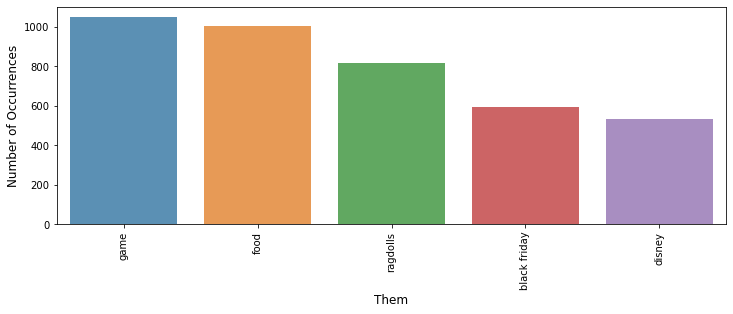

In [257]:
cnt_pro = df['content_them'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Them', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [258]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [259]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions, labels=my_tags)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

In [260]:
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['content'])
    predictions = classifier.predict(data_features)
    target = data['content_them']
    evaluate_prediction(predictions, target)

In [268]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['content'] = df['content'].apply(cleanText)
df['content'] = df['content'].str.replace(r'([^A-Za-z0-9 ])+', '' ,regex=True)
df

,content,content_them
0,every time im in my kitchen i have to step ove...,ragdolls
1,the confidence change between day 1 and week 2...,ragdolls
2,human is there something for us to eat,ragdolls
3,she loves playing under the sheets when i make...,ragdolls
4,look at this knob,ragdolls
...,...,...
3994,omg im an idiot thank you,game
3995,if you like it pls follow my piiv acc,game
3996,my goodness i want to cuddle her tt,game
3997,very beautiful for being 2d art this is phenom...,game


## Bag Of Words

In [269]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens


In [270]:
%%time
# training
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=3000) 
train_data_features = count_vectorizer.fit_transform(train['content'])

CPU times: user 326 ms, sys: 5.21 ms, total: 331 ms
Wall time: 332 ms


In [271]:
%%time

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train['content_them'])

CPU times: user 1.23 s, sys: 347 ms, total: 1.58 s
Wall time: 380 ms


/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [276]:
count_vectorizer.get_feature_names()[150:200]

['alright',
 'alternate',
 'alternative',
 'amazing',
 'amazon',
 'amber',
 'amc',
 'america',
 'american',
 'americanized',
 'ammount',
 'amos',
 'andy',
 'andys',
 'anemo',
 'anemoa',
 'angel',
 'aniety',
 'animal',
 'animals',
 'animated',
 'animation',
 'animations',
 'anise',
 'anniversary',
 'answer',
 'antibiotic',
 'ants',
 'anybody',
 'anymore',
 'aoe',
 'apart',
 'app',
 'apparently',
 'appear',
 'appearance',
 'appetite',
 'apple',
 'apples',
 'applesauce',
 'application',
 'applying',
 'appointment',
 'appreciate',
 'aqua',
 'ar',
 'ar45',
 'archaic',
 'archer',
 'archers']

accuracy 0.7308333333333333
confusion matrix
 [[221   9  21   6   6]
 [ 32  88  12   7  18]
 [ 29  14 224   9  24]
 [ 14   6  11 138   9]
 [ 35  23  25  13 206]]
(row=expected, col=predicted)
CPU times: user 188 ms, sys: 5.06 ms, total: 193 ms
Wall time: 192 ms


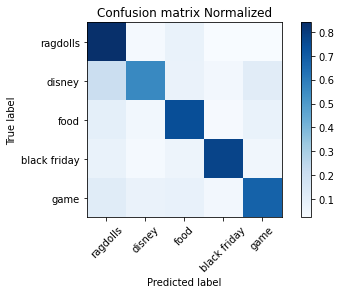

In [273]:
%%time

predict(count_vectorizer, logreg, test)

In [277]:
def most_influential_words(vectorizer, genre_index=0, num_words=10):
    features = vectorizer.get_feature_names()
    max_coef = sorted(enumerate(logreg.coef_[genre_index]), key=lambda x:x[1], reverse=True)
    return [features[x[0]] for x in max_coef[:num_words]] 

In [278]:
# words for the fantasy genre
genre_tag_id = 1
print(my_tags[genre_tag_id])
most_influential_words(count_vectorizer, genre_tag_id)

disney


['disney',
 'evil',
 'simba',
 'buzz',
 'villains',
 'painting',
 'mouse',
 'hercules',
 'minnie',
 'comic']

In [279]:
train_data_features[0]

<1x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

## N-grams

In [282]:
%%time
n_gram_vectorizer = CountVectorizer(
    analyzer="char",
    ngram_range=([2,5]),
    tokenizer=None,    
    preprocessor=None,                               
    max_features=3000) 

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

train_data_features = n_gram_vectorizer.fit_transform(train['content'])

logreg = logreg.fit(train_data_features, train['content_them'])

CPU times: user 3.61 s, sys: 789 ms, total: 4.4 s
Wall time: 1.59 s


/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [283]:
n_gram_vectorizer.get_feature_names()[50:60]

[' any ', ' ap', ' app', ' ar', ' are', ' are ', ' as', ' as ', ' at', ' at ']

accuracy 0.6658333333333334
confusion matrix
 [[186  20  28   3  26]
 [ 24  69  23  12  29]
 [ 21  27 206   9  37]
 [ 15  11  15 122  15]
 [ 20  26  26  14 216]]
(row=expected, col=predicted)


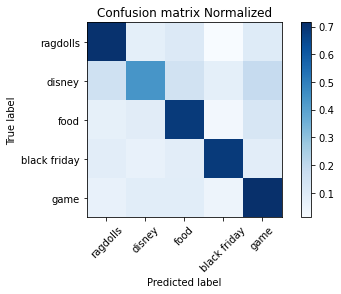

In [285]:
predict(n_gram_vectorizer, logreg, test)

## TI-IDF

In [287]:
%%time
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english')
train_data_features = tf_vect.fit_transform(train['content'])

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train['content_them'])


CPU times: user 1.44 s, sys: 331 ms, total: 1.77 s
Wall time: 682 ms


/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [288]:
tf_vect.get_feature_names()[1000:1010]

['eplanation',
 'eplode',
 'eploration',
 'eplorer',
 'eploring',
 'eposure',
 'equal',
 'equally',
 'equipped',
 'equivalent']

accuracy 0.75
confusion matrix
 [[222   7  20   8   6]
 [ 30  88  12   5  22]
 [ 27  14 230   6  23]
 [ 12   7  15 136   8]
 [ 33  12  23  10 224]]
(row=expected, col=predicted)


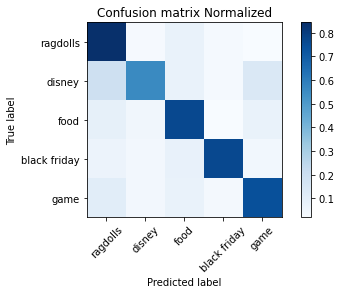

In [290]:
predict(tf_vect, logreg, test)

In [291]:
most_influential_words(tf_vect, 1)

['disney',
 'painting',
 'simba',
 'evil',
 'buzz',
 'hercules',
 'movie',
 'ariel',
 'villains',
 'mouse']

# BERT

## Set Up

In [371]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset

In [295]:
df.head()

,content,content_them
0,every time im in my kitchen i have to step ove...,ragdolls
1,the confidence change between day 1 and week 2...,ragdolls
2,human is there something for us to eat,ragdolls
3,she loves playing under the sheets when i make...,ragdolls
4,look at this knob,ragdolls


In [297]:
df_shaffled = df.sample(frac = 1)
df_shaffled.head()

,content,content_them
2655,if this deal has epired or sold out you can re...,black friday
1084,thanosdidnothingwrong,disney
483,murphy,ragdolls
2030,almost all meat stocks have gelatin in them be...,food
1413,rolling pin set from nyc chinatown supply stor...,food


In [325]:
valuesArr = df_shaffled.values

train_value = valuesArr[:int(len(valuesArr)*0.80)]
test_value = valuesArr[int(len(valuesArr)*0.80):]

df_train = pd.DataFrame(data=train_value, columns=df_shaffled.columns)
df_test = pd.DataFrame(test_value, columns=df_shaffled.columns)
df_test = df_test[['content']]

In [322]:
from sklearn.model_selection import train_test_split

X = df_train.content.values
y = df_train.content_them.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

array(['the nine old men nickname for disneys core animators who worked from snow white  the seven dwarfs to the rescuersthe alley cats the band from the aristocatsthe beagle boyshigher for hire from talespindanger rangers evil counterparts from chip n  dale rescue rangers comic bookthe kookoo cola cult also from rescue rangersthe mousewatch titular spy organization from a rescue rangers spinoff novel seriesrats aka rogue animal thief society archvillains of the mousewatchjust us ducks from darkwing duckshush spy organization from ducktales and darkwing duckfowl villains from darkwing duck and ducktalesthe fearsom five also from darkwing duckthe bears of gummi glenn from adventures of the gummie bearsthe barbics also from adventures of the gummie bearsthe everonian empire villains from the italian comic duck avenger aka pk the new adventurespbi spy organization from the italian comic double duck that donald sometimes works foractinia enemy spy organization from double duckthe manhattan

## TF-IDF

In [327]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_val_tfidf = tf_idf.transform(X_val)

CPU times: user 268 ms, sys: 16.7 ms, total: 285 ms
Wall time: 287 ms


## Naive Bayes Classifier

In [338]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, cv=kf)

    return auc.mean()

In [339]:
MultinomialNB(0.01)

/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=0.01 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MultinomialNB(alpha=0.01)

/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.2000000000000002 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: Futu

/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=3.8000000000000025 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=3.9000000000000026 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=4.000000000000003 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=6.600000000000005 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=6.700000000000005 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=6.800000000000005 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/u

/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=9.400000000000007 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=9.500000000000007 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=9.600000000000009 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/u

Best alpha:  1.0


/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=9.800000000000008 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/oqian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=9.900000000000007 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


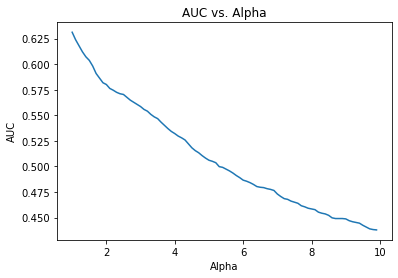

In [379]:
from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

## Evaluation on Validation Set

In [345]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%' % roc_auc)
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [397]:
dict_index_category = {}
classes = nb_model.classes_
for i in range(len(classes)):
    dict_index_category[i] = classes[i]

In [360]:
# the first line of the result, mapping from index to gt
result_1 = dict_index_category[np.argmax(probs[0])]
result_1

'food'

In [376]:
label = []
for i in range(len(y_val)):
    if y_val[i] == dict_index_category[np.argmax(probs[i])]:
        label.append(1)
    else:
        label.append(0)
label_y = np.array(label)

AUC: 0.2962
Accuracy: 32.81%


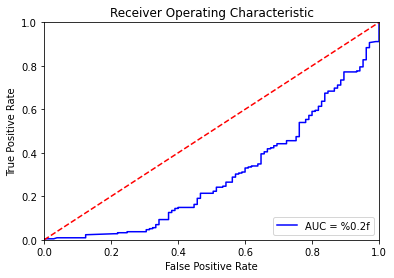

In [378]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, label_y)

## Random Forest

In [380]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [383]:
vectorizer = CountVectorizer(min_df=1)
X_rf = vectorizer.fit_transform(X_train).toarray()

In [391]:
X_val[0]

'how long did it take have the same setup with a ragdoll and dsh kitten and they get along and play together but definitely not friends yet and did you do much to help it along  i try playing with them together feeding them treats together etc'

In [393]:
y_train

array(['disney', 'game', 'ragdolls', ..., 'food', 'black friday', 'game'],
      dtype=object)

In [394]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.predict(vectorizer.transform([X_val[0]]).toarray())

ValueError: could not convert string to float: 'the nine old men nickname for disneys core animators who worked from snow white  the seven dwarfs to the rescuersthe alley cats the band from the aristocatsthe beagle boyshigher for hire from talespindanger rangers evil counterparts from chip n  dale rescue rangers comic bookthe kookoo cola cult also from rescue rangersthe mousewatch titular spy organization from a rescue rangers spinoff novel seriesrats aka rogue animal thief society archvillains of the mousewatchjust us ducks from darkwing duckshush spy organization from ducktales and darkwing duckfowl villains from darkwing duck and ducktalesthe fearsom five also from darkwing duckthe bears of gummi glenn from adventures of the gummie bearsthe barbics also from adventures of the gummie bearsthe everonian empire villains from the italian comic duck avenger aka pk the new adventurespbi spy organization from the italian comic double duck that donald sometimes works foractinia enemy spy organization from double duckthe manhattan clan from gargoylesanatos enterprises from gargoylesthe pack from gargoyles'